<a href="https://colab.research.google.com/github/rajitakolla/pythonCode/blob/master/INFO_5502_Assignment07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Name: Rajita Kolla**
# **Student id: 11369877**

Gitlink : https://github.com/rajitakolla/pythonCode/blob/master/INFO_5502_Assignment07.ipynb

#**Implement a KNN Classifier**

**The k-nearest neighbors algorithm is among the simplest of all machine learning
algorithms.An object is classified by a majority vote of its neighbors with the 
bject being assigned to the class most common among its k nearest neighbors.
K is a positive integer, typically small: k = 3, 5, or 10.**

---


**KNN can do multiple (more than two) class prediction.**

**INCLUDE THE REQUIRED LIBRARIES**

In [0]:
import numpy as np
import pandas as pd
import matplotlib as mat
import datascience as dsc
import sklearn as sk

/usr/local/lib/python3.6/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


In [0]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
%matplotlib inline

**sklearn libraries**

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

#**Import the Dataset**

In [0]:
from sklearn.datasets import load_iris

In [0]:
data = load_iris()
type(data)

In [112]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [113]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

**Convert sklearn.utils.Bunch to DataFrame**

In [0]:
def apply_values_to_target(value):
  if(value == 0):
    return 'setosa'
  elif(value == 1):
    return 'versicolor'
  elif(value == 2):
    return 'virginica'
  else:
    return np.NaN
  pass

In [115]:
iris_data = pd.DataFrame(data= np.c_[data['data'], data['target']], columns= data['feature_names'] + ['target'])
iris_data['species'] = iris_data['target'].apply(apply_values_to_target)
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


#**PreProcess the dataset to check if any null values exist**

In [116]:
iris_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

#**Exploratory Data Analysis**

**Find the dimensions of Dataset**

In [117]:
iris_data.shape

(150, 6)

**Analyse the type of Variables in DataSet**

In [118]:
iris_data.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target               float64
species               object
dtype: object

**Find the statistics of the Function Using describe** (applicble to numeric data)

In [119]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


**Plot a histogram to visualize the dataset**

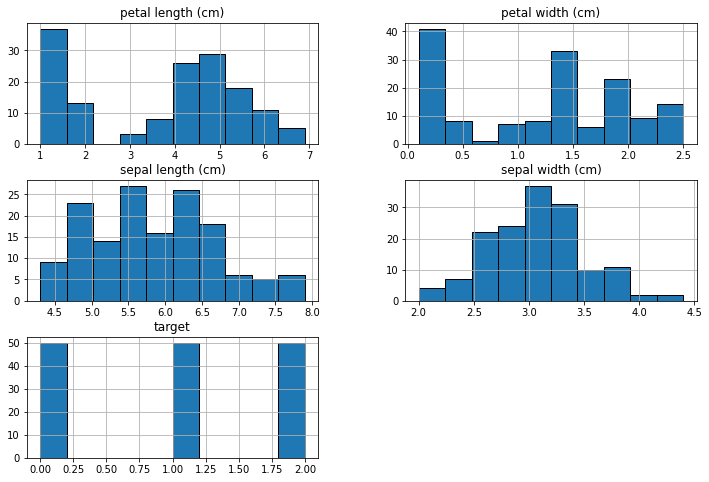

In [120]:
iris_data.hist(figsize=(12,8))
mat.pyplot.show(block=False)

**Visualize using Box plot to find if any outliers exist**

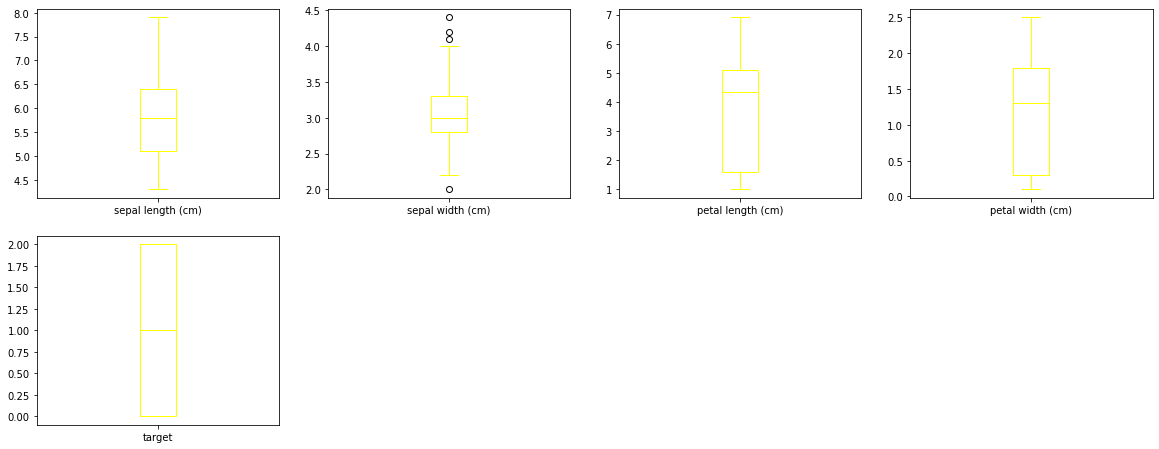

In [121]:
iris_data.plot(kind = 'box', subplots = True , layout = (4,4) , sharex = False , figsize = ( 20 , 16 ),color ='Yellow')
mat.pyplot.show(block=False)

**visualize the columns using scatter plot to analyse the realtion ship between each column**

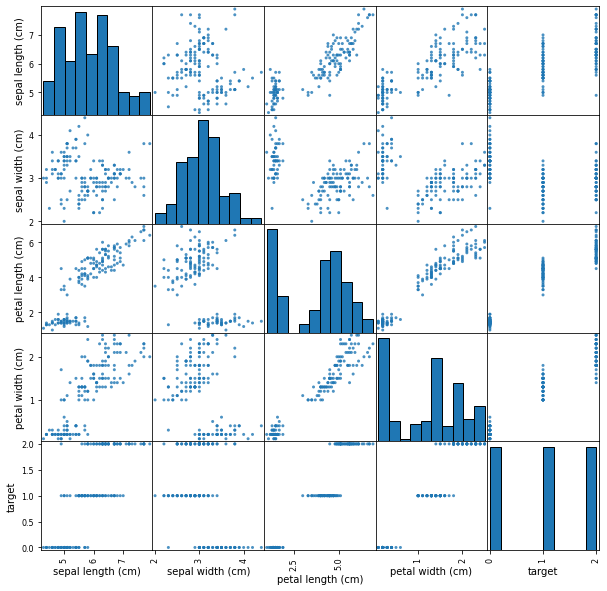

In [122]:
pd.plotting.scatter_matrix(iris_data, alpha=0.8, figsize=(10, 10))
mat.pyplot.show(block=False)

**Separate the dataset into the training and test datasets**

**Why do we separate the whole data into 2 arrays (we will later split the data into train and score)?
Training data Set (X) consist of the independent variables or predictors
Desired Output (Y) consist of the dependent variable or that which we are trying to predict**



In [0]:
# store dataframe iris_data into a numpy array
array = iris_data.values
# separate array into input and output by slicing
# for X(input) [:, 0:4] --> all the rows, columns from 1 - 4 (5 - 1)
# these are the independent variables or predictors
X = array[:,0:4]
# for Y(input) [:, 5] --> all the rows, column 5
# this is the value we are trying to predict
Y = array[:,5]

**Split the input/output arrays into the training/testing datasets**

In [0]:
# split the dataset --> training sub-dataset: 67%; test sub-dataset: 33%
test_size = 0.33
#selection of records to include in each data sub-dataset must be done randomly
seed = 7
#split the dataset (input and output) into training / test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,random_state=seed)

**Build the model**

**create a regression model and train the model with the test data and compute the classification report value**


The code below build the Model, Train the model using the training sub-dataset, 
Print out the coefficientsand the intercept,
Print intercept and coefficients, 
if we want to print out the list of coefficients with theircorrespondent variable name, 
pair the feature names with the coefficients and convert iterator in to set

In [126]:
#build the model
model = KNeighborsClassifier()
# train the model using the training sub-dataset
model.fit(X_train, Y_train)
#print the classification report
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.85      0.94      0.89        18
   virginica       0.94      0.83      0.88        18

    accuracy                           0.92        50
   macro avg       0.93      0.93      0.93        50
weighted avg       0.92      0.92      0.92        50



#**Accuracy level**

In [0]:
#score the accuracy level
result = model.score(X_test, Y_test)
#print out the results
print(("Accuracy: %.3f%%") % (result*100.0))

Accuracy: 92.000%


#**Predict the outcomes**

In [127]:
model.predict([[5.1,3.5,1.4,0.2]])

array(['setosa'], dtype=object)

#**Analyse the outcomes of the predicted models**

**In k-fold cross-validation, the original sample is randomly partitioned into k equal sized
subsamples. Of the k subsamples, a single subsample is retained as the validation data for
testing the model, and the remaining k − 1 subsamples are used as training data. The crossvalidation process is then repeated 
k times, with each of the k subsamples used exactly once as
the validation data. The k results can then be averaged to produce a single estimation. The
advantage of this method over repeated random sub-sampling is that all observations are used for
both training and validation, and each observation is used for validation exactly once**

In [0]:
def analyse_the_accuracy(n_splits):
  # evaluate the algorythm
  # fix the random seed
  # must use the same seed value so that the same subsets can be obtained
  # for each time the process is repeated
  seed = 7
  # split the whole dataset into folds 
  kfold = KFold(n_splits, random_state=seed,shuffle=True)
  # for logistic regression, we can use the accuracy level to evaluate the model / algorithm
  scoring = 'accuracy'
  return kfold
  pass

In [0]:
import warnings
warnings.filterwarnings('ignore')

**specify the number of time of repeated splitting, Fix the random seed,
Must use the same see value sothat the same subset can be obtained for each time the process is repeated,
Split the whole data set intofolds, for logistic regression, we can use accuracy level to evaluate the model/algorithm, 
train the model and run k-fold cross-validation to validate/evaluate the model, Print out the evaluation results**

In [0]:
def find_the_accuracy(n_splits):
  kfold = analyse_the_accuracy(n_splits)
  # train the model and run K-fold cross validation to validate / evaluate the model
  results = cross_val_score(KNeighborsClassifier(n_splits), X, Y, cv = kfold, scoring=scoring)
  # print the evaluationm results
  # result: the average of all the results obtained from the K-fold cross validation
  print("Accuracy after cross score validation: %.f splits %.3f percent with std (%.3f)" % (n_splits, results.mean()*100, results.std()))
  return results.mean()
  pass

In [161]:
def execute_using_random_k_values():
  error_values = list()
  k_set = range(2,16,2)
  for i in k_set:
    error_values.append(1-find_the_accuracy(i))
  return k_set[error_values.index(min(error_values))]
  pass

#execute_using_random_k_values()

#predict best value
print(f"Best k value {execute_using_random_k_values()}")


Accuracy after cross score validation: 2 splits 94.667 percent with std (0.000)
Accuracy after cross score validation: 4 splits 95.999 percent with std (0.030)
Accuracy after cross score validation: 6 splits 95.333 percent with std (0.043)
Accuracy after cross score validation: 8 splits 95.980 percent with std (0.035)
Accuracy after cross score validation: 10 splits 97.333 percent with std (0.044)
Accuracy after cross score validation: 12 splits 96.688 percent with std (0.050)
Accuracy after cross score validation: 14 splits 95.455 percent with std (0.082)
Best k value 10


**After running the model with repeated k values starting from 2 to 16 with step count 2
The accuracy after cross fold validation is highest for 10 splits which is nearly 97 percentage. 
The accuracy score before validation is 92 percentage**